# Week-4 Excercise -1
 By-

**Pratinav Seth 200968216**

### Q1. Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. 
###Use “sklearn.model_selection” and GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:

- Splitting criteria: gini or entropy.
- Maximum depth of decision tree ranging from 2 to 10.
- The searching of optimal parameter will be validated using 10-fold cross 
validation and the most optimal parameter will be chosen based on ROC 
AUC score.



In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
from sklearn.tree import export_text
import cv2

In [2]:
df = pd.read_csv("German Credit Data.csv")

In [3]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
df.isnull().values.any()

False

In [5]:
labelencoder = LabelEncoder()
df['checkin_acc'] = labelencoder.fit_transform(df['checkin_acc'])
df['credit_history'] = labelencoder.fit_transform(df['credit_history'])
df['savings_acc'] = labelencoder.fit_transform(df['savings_acc'])
df['present_emp_since'] = labelencoder.fit_transform(df['present_emp_since'])
df['personal_status'] = labelencoder.fit_transform(df['personal_status'])
df['inst_plans'] = labelencoder.fit_transform(df['inst_plans'])
df['job'] = labelencoder.fit_transform(df['job'])

In [6]:
mapping = {0: "No", 1: "Yes" }
df['status'] = df['status'].map(mapping)

In [7]:
y=df['status']
X = df.drop(['status'], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
predTree = dtc.predict(X_test)

In [11]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.705


In [12]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':list(range(2, 11))}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters,cv = 10, scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [13]:
print("Best Parameters",clf.best_params_)

Best Parameters {'criterion': 'gini', 'max_depth': 3}


In [14]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [15]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
predTree = dt.predict(X_test)

In [17]:
print("DecisionTrees's Accuracy: after gridsearch ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy: after gridsearch  0.765


In [18]:
fn=['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc','present_emp_since', 'inst_rate', 'personal_status', 'residing_since','age', 'inst_plans', 'num_credits', 'job']
cn=['No', 'Yes']

### Q2. Visualize the tree using graphviz software.

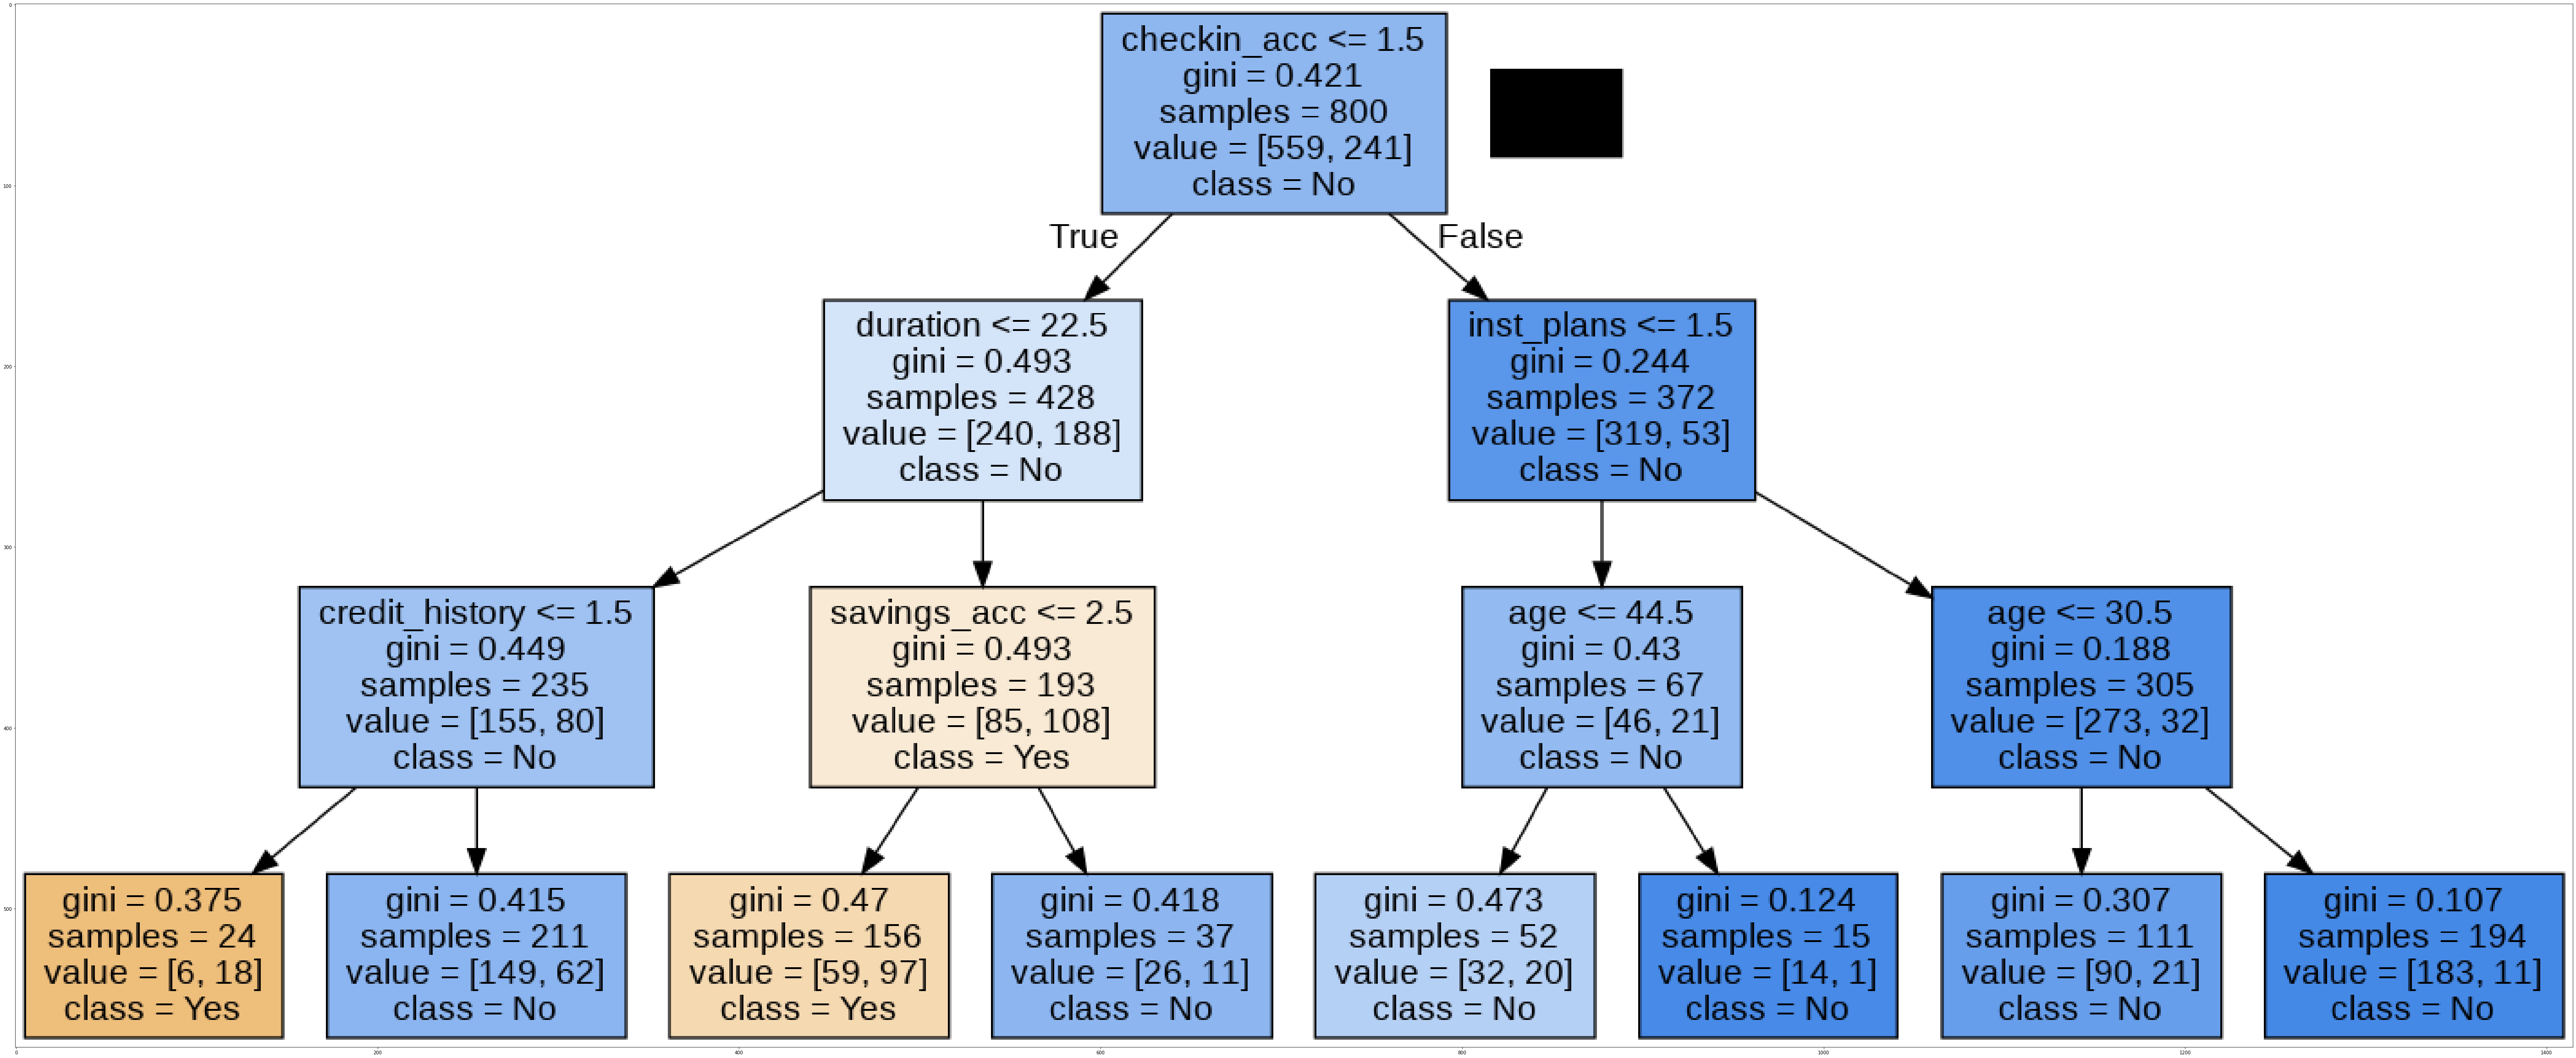

In [19]:
dot_data = StringIO()
filename = "tree.png"
out=tree.export_graphviz(dt,out_file=dot_data,feature_names = fn, class_names=cn,filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = cv2.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Q3. Display the text representation of the rules learnt.

In [20]:
r = export_text(dt, feature_names=fn)

In [21]:
print(r)

|--- checkin_acc <= 1.50
|   |--- duration <= 22.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- class: Yes
|   |   |--- credit_history >  1.50
|   |   |   |--- class: No
|   |--- duration >  22.50
|   |   |--- savings_acc <= 2.50
|   |   |   |--- class: Yes
|   |   |--- savings_acc >  2.50
|   |   |   |--- class: No
|--- checkin_acc >  1.50
|   |--- inst_plans <= 1.50
|   |   |--- age <= 44.50
|   |   |   |--- class: No
|   |   |--- age >  44.50
|   |   |   |--- class: No
|   |--- inst_plans >  1.50
|   |   |--- age <= 30.50
|   |   |   |--- class: No
|   |   |--- age >  30.50
|   |   |   |--- class: No

